In [1]:
import pandas as pd

In [40]:
# https://github.com/bahar/WorldCityLocations

cities = pd.read_csv(
    "https://github.com/bahar/WorldCityLocations/raw/master/World_Cities_Location_table.csv",
    delimiter=";",
    header=None
).set_axis(["id", "country", "city", "latitude", "longitude", "altitude"], axis=1)
cities.loc[cities.loc[:, "altitude"] < 0, "altitude"] = 0

In [41]:
cities.head()

,id,country,city,latitude,longitude,altitude
0,1,Afghanistan,Kabul,34.516667,69.183334,1808.0
1,2,Afghanistan,Kandahar,31.610000,65.699997,1015.0
2,3,Afghanistan,Mazar-e Sharif,36.706944,67.112221,369.0
3,4,Afghanistan,Herat,34.340000,62.189999,927.0
4,5,Afghanistan,Jalalabad,34.420000,70.449997,573.0


In [44]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567 entries, 0 to 10566
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10567 non-null  int64  
 1   country    10567 non-null  object 
 2   city       10563 non-null  object 
 3   latitude   10567 non-null  float64
 4   longitude  10567 non-null  float64
 5   altitude   10567 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 495.5+ KB


In [29]:
import plotly.express as px

In [60]:
lat, lon = cities.loc[cities.loc[:, "city"] == "Tokyo", ["latitude", "longitude"]].iloc[0]

In [63]:
px.scatter_mapbox(
    cities,
    lat="latitude",
    lon="longitude",
    hover_name="city",
    hover_data=["country"],
    center={"lat": lat, "lon": lon},
    width=1000,
    height=800,
    zoom=1,
    mapbox_style="carto-positron",
).show()

In [65]:
from geopy.geocoders import Nominatim

In [67]:
from geopy import distance

In [94]:
def get_lat_lon(df, city):
    lat, lon, alt = df.loc[cities.loc[:, "city"] == city, ["latitude", "longitude", "altitude"]].iloc[0]
    return lat, lon, alt

In [95]:
Tokyo = get_lat_lon(cities, "Tokyo")
Honolulu = get_lat_lon(cities, "Honolulu")
Anchorage = get_lat_lon(cities, "Anchorage")


In [98]:
distance.distance(Tokyo[:2], Honolulu[:2]).km

6215.138362382594

In [100]:
distance.distance(Tokyo[:2], Anchorage[:2]).km

5574.632960730626

In [104]:
import geopandas

In [125]:
# https://datahub.io/core/geo-countries

gdf = geopandas.read_file("https://datahub.io/core/geo-countries/r/0.geojson")

In [126]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

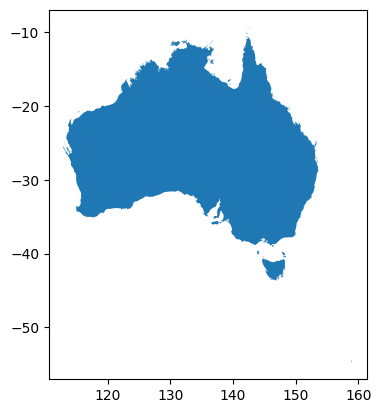

In [131]:
aus = gdf.loc[gdf.loc[:, "ISO_A3"] == "AUS", "geometry"]
aus.plot()

<AxesSubplot:>

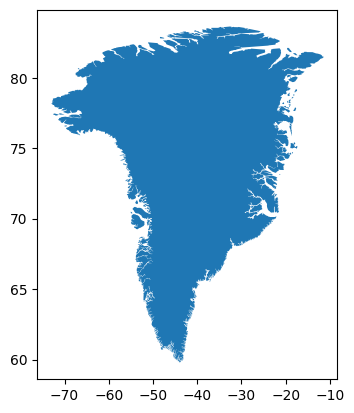

In [133]:
grl = gdf.loc[gdf.loc[:, "ISO_A3"] == "GRL", "geometry"]
grl.plot()

In [156]:
world = geopandas.read_file(geobpandas.datasets.get_path('naturalearth_lowres'))

In [189]:
aus_grl = world.copy()
aus_grl.loc[aus_grl.loc[:, "iso_a3"].isin(["AUS", "GRL"]), "dummy"] = 1000

In [203]:
s = aus_grl.dropna().loc[:, "geometry"]

In [217]:
import numpy as np

x = np.mean([s.bounds.min()["minx"], s.bounds.max()["maxx"]])
y = np.mean([s.bounds.min()["miny"], s.bounds.max()["maxy"]])
x, y

(40.13623451447209, 20.005266368318953)

In [219]:
import folium

m = folium.Map(location=[x, y], zoom_start=1, width=500, height=400)
folium.Choropleth(
    aus_grl,
    data=aus_grl,
    key_on="feature.properties.iso_a3",
    columns=["iso_a3", "dummy"],
).add_to(m)
folium.LayerControl().add_to(m)
m